In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


data = pd.read_csv("Maternal_Health_Risk_Dataset.csv")

data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [2]:
data.loc[4]

Age                  35
SystolicBP          120
DiastolicBP          60
BS                  6.1
BodyTemp           98.0
HeartRate            76
RiskLevel      low risk
Name: 4, dtype: object

In [3]:
data.shape

(1014, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
data.duplicated().sum()


562

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


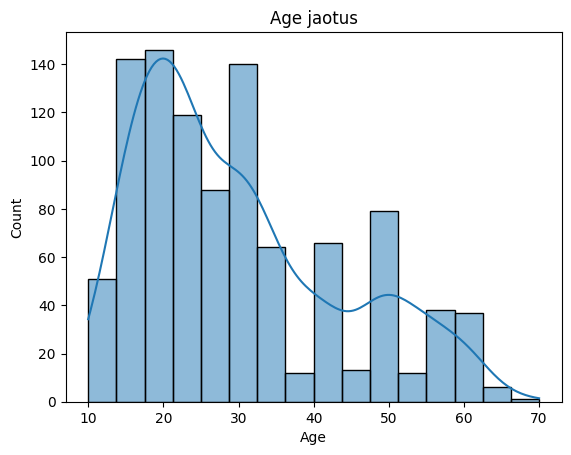

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


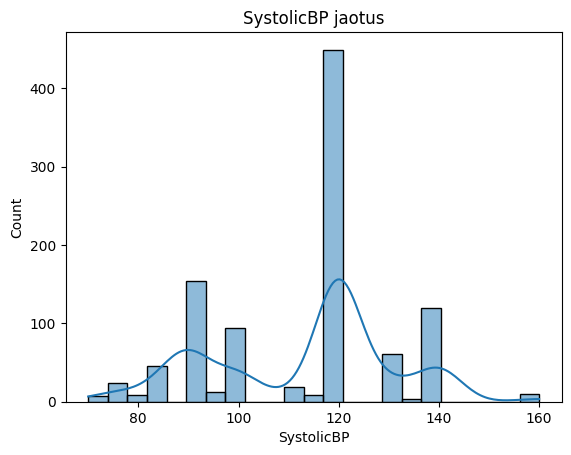

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


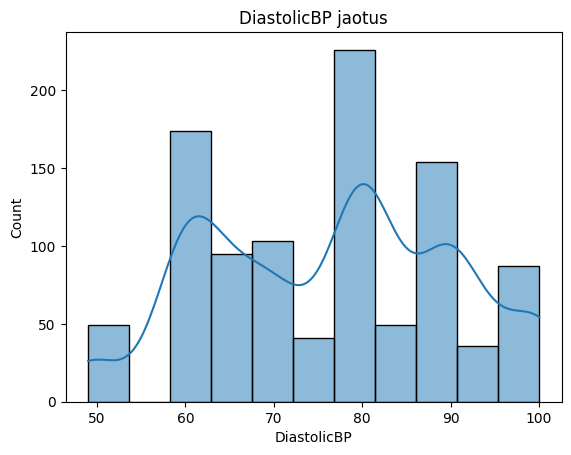

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


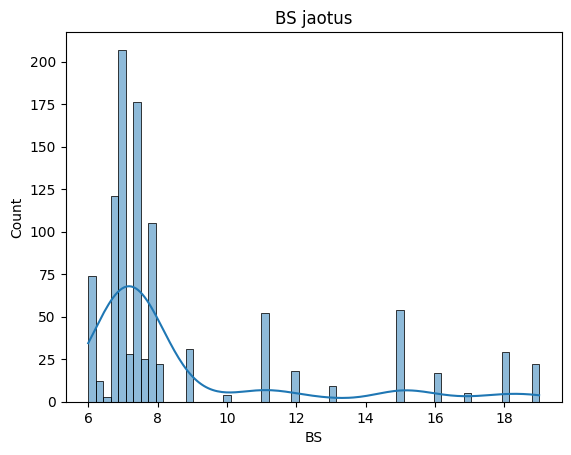

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


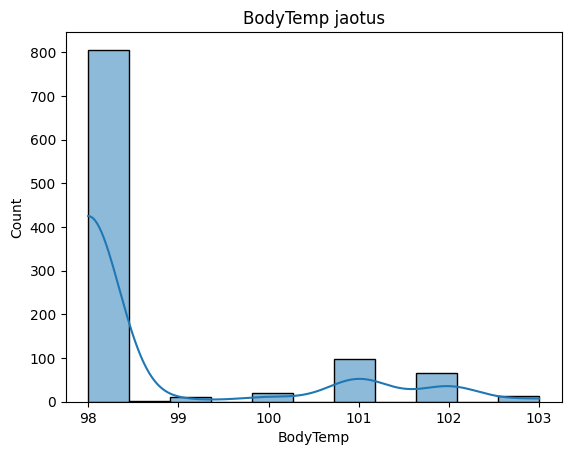

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


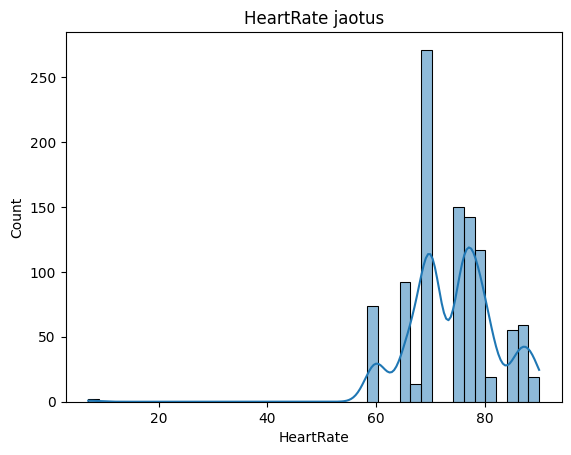

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


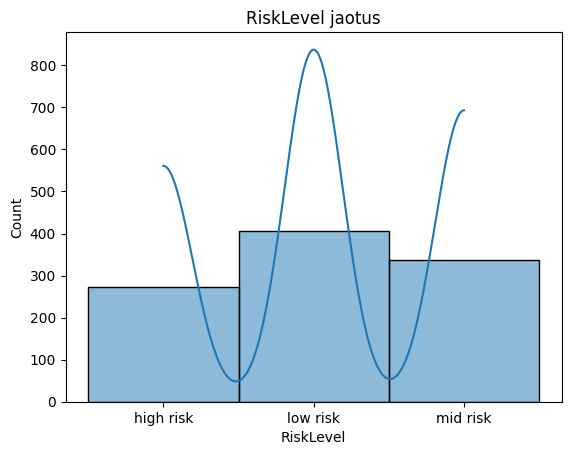

In [8]:
# Vizualisation 
for var in ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate','RiskLevel']:
    sns.histplot(data=data, x=var, kde=True)
    plt.title(f'{var} jaotus')
    plt.show()



C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


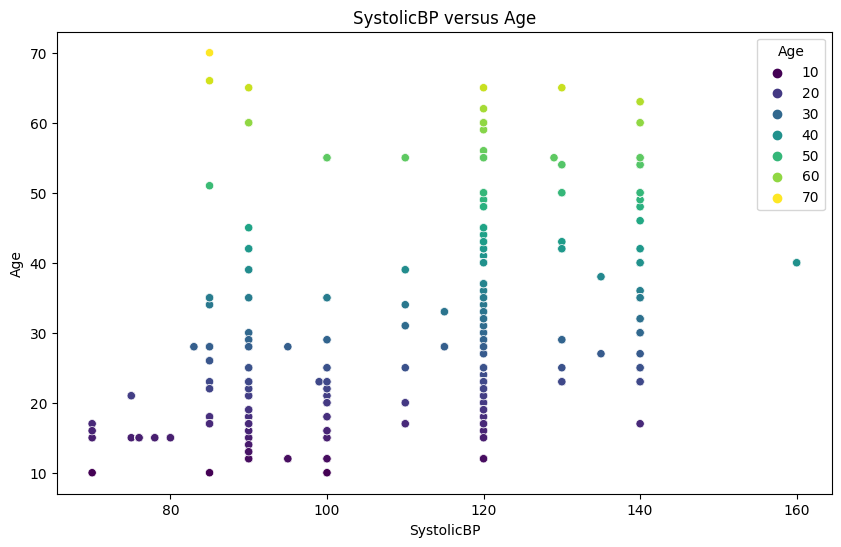

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


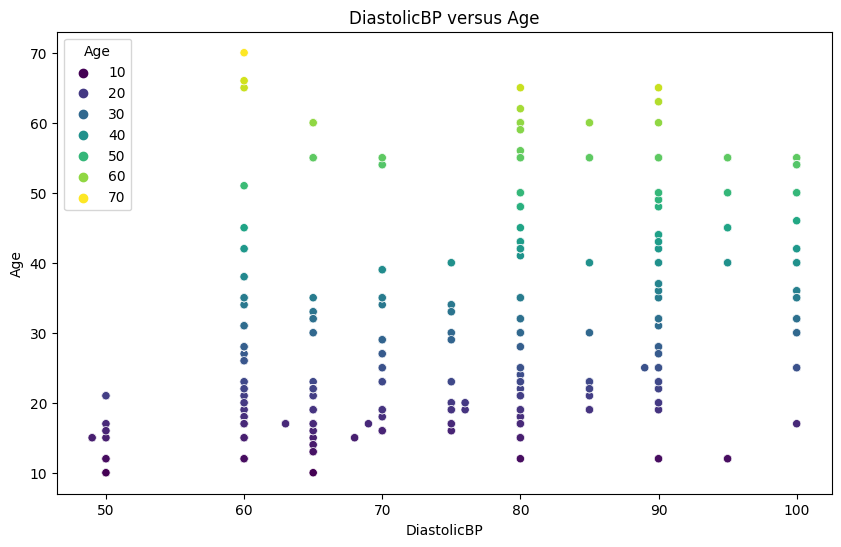

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


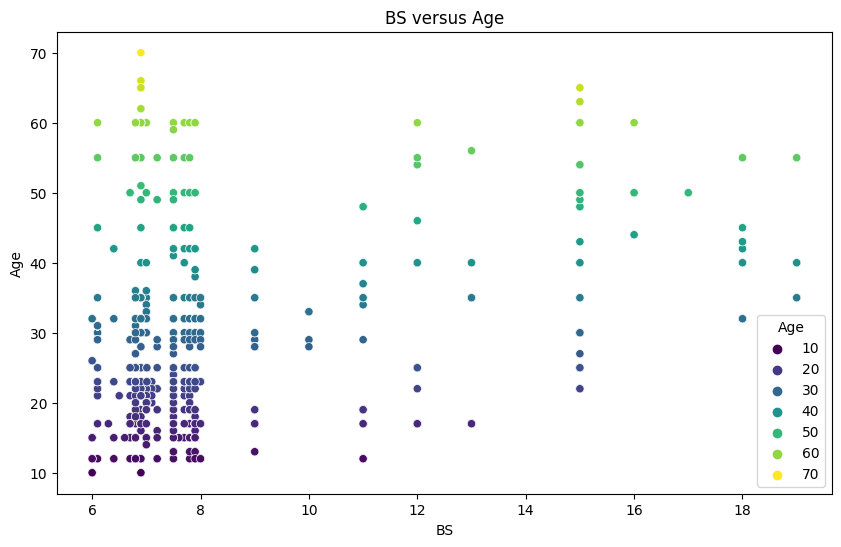

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


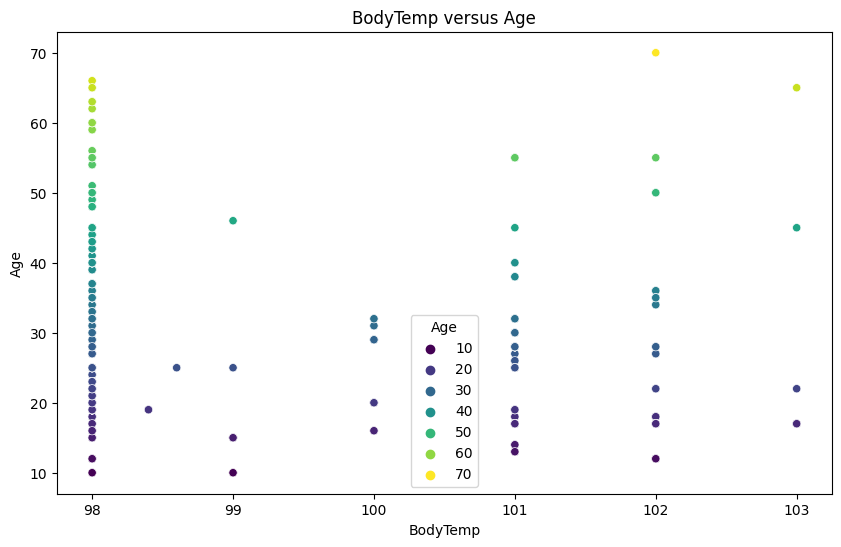

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


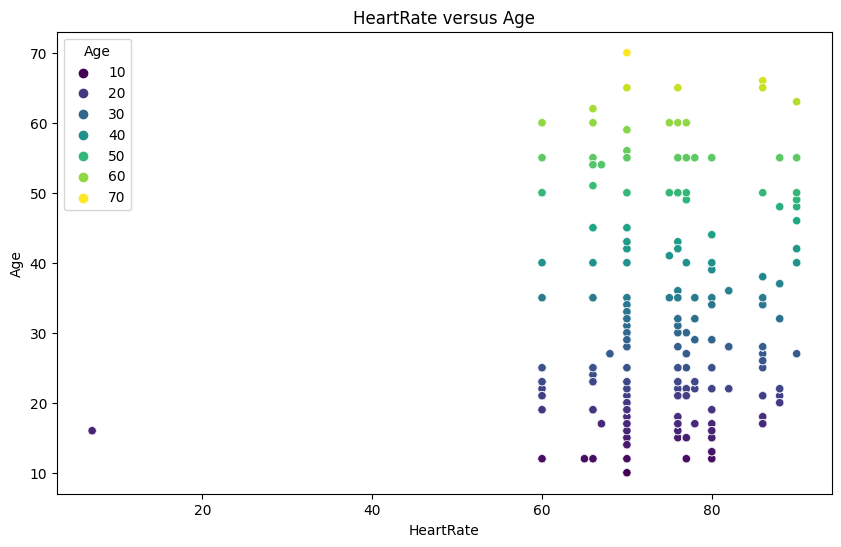

In [9]:
variables = ['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=var, y='Age', hue='Age', palette='viridis')
    plt.title(f'{var} versus Age')
    plt.show()

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


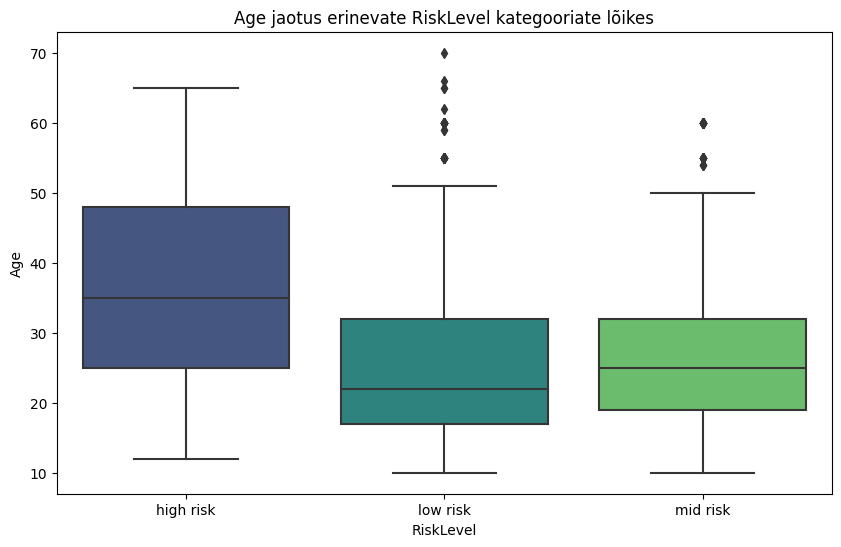

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


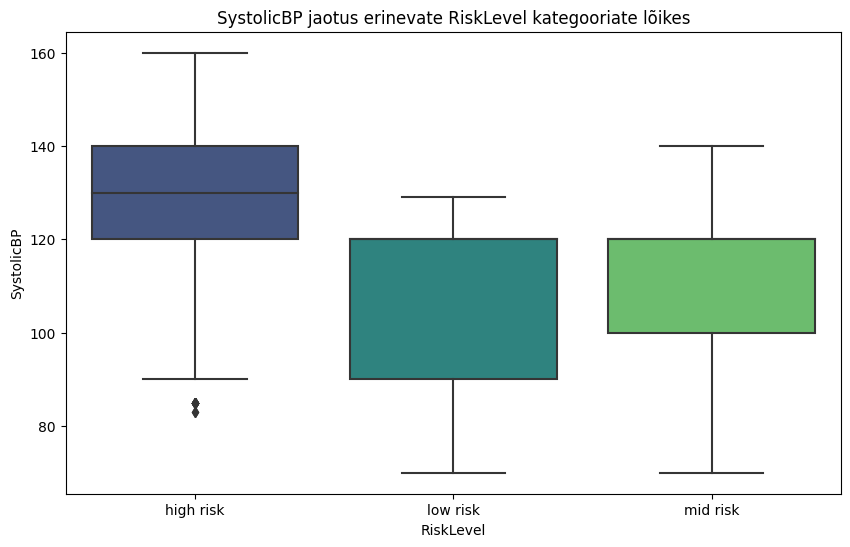

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


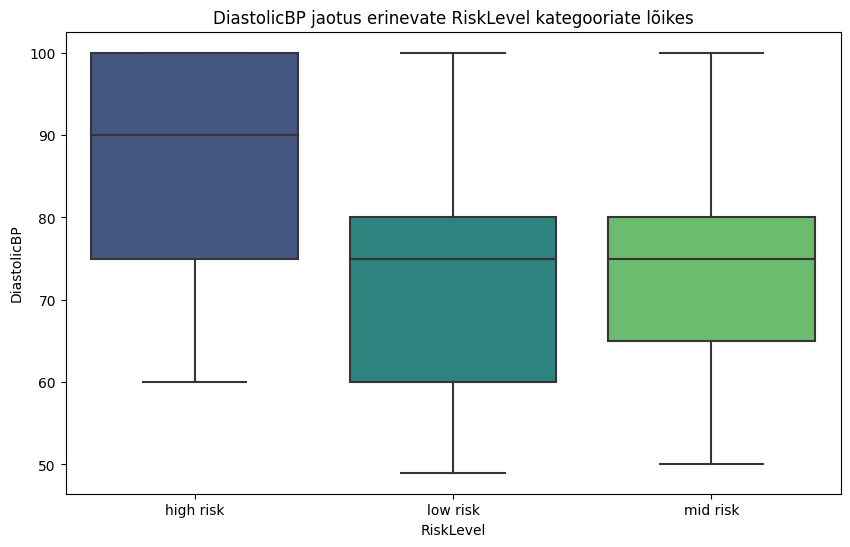

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


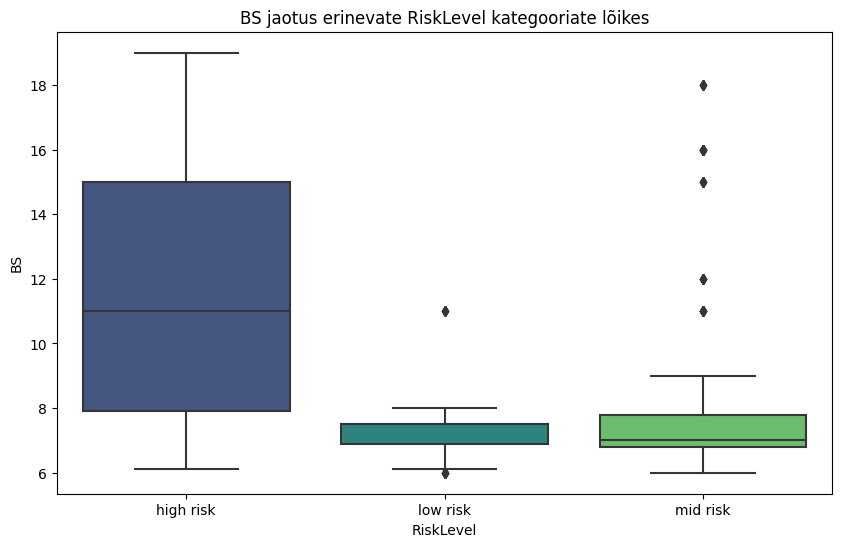

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


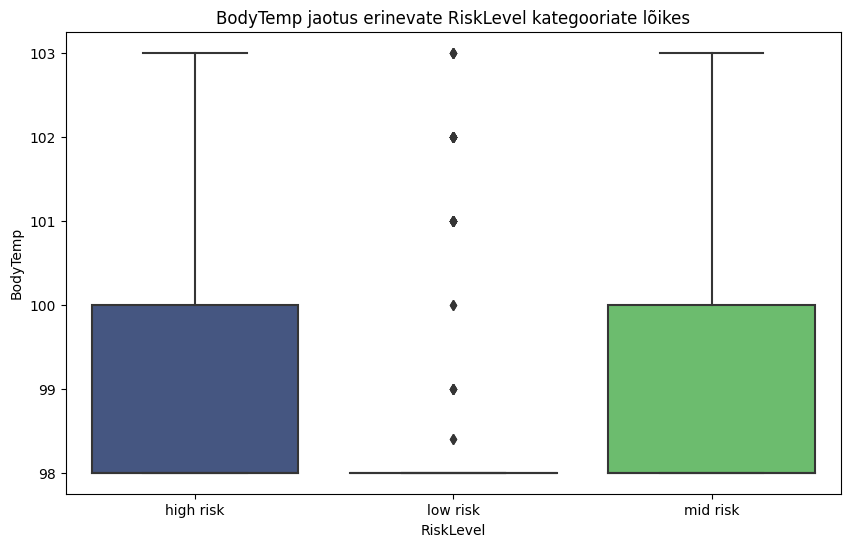

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


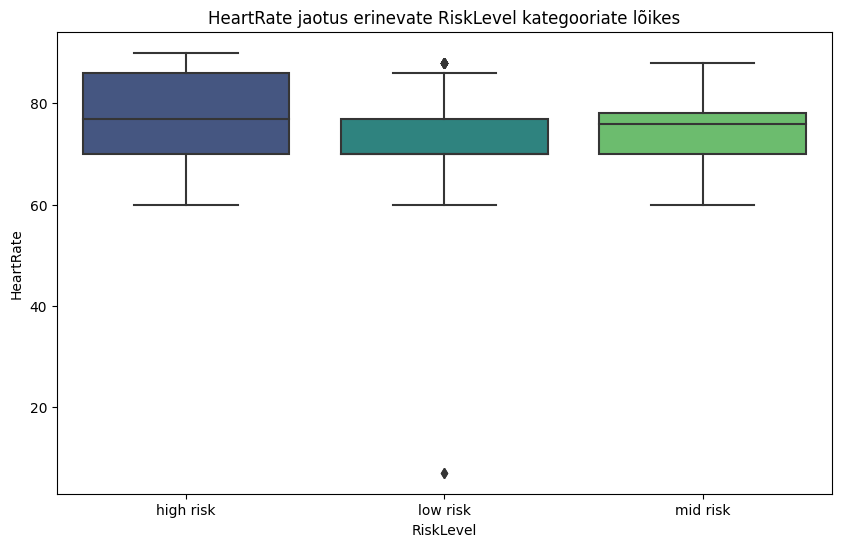

In [10]:
for var in ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='RiskLevel', y=var, palette='viridis')
    plt.title(f'{var} jaotus erinevate RiskLevel kategooriate lõikes')
    plt.show()

In [11]:
# delete duplicate


#data[data["HeartRate"]==7]

#data[data["Age"]<12]
#data[data["Age"]>60]

#data[data["SystolicBP"] < 70]
#data[data["SystolicBP"] >180]

#data[data["DiastolicBP"] < 40]
#data[data["DiastolicBP"]> 120]

#data[(data["SystolicBP"] - data["DiastolicBP"])> 60]

#data[(data["SystolicBP"] - data["DiastolicBP"])< 30]

#data[(data["BS"] > 15)&(data["RiskLevel"] != 'high risk') ]

data = data.drop_duplicates()


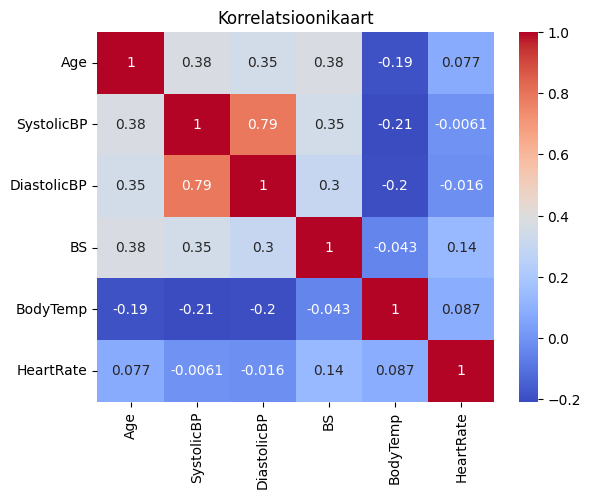

In [12]:
# Correlation
corr = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']].corr()
#corr = data[['SystolicBP','BS']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korrelatsioonikaart')
plt.show()

Korrelatsion diagramm näitab, et kõrgema korrelatsiooniga on vererõhu näitajad SystolicBP ja DiastolicBP, mis on hästi tuntud.

DecisionTreeClassifier Accuracy: 0.5934065934065934


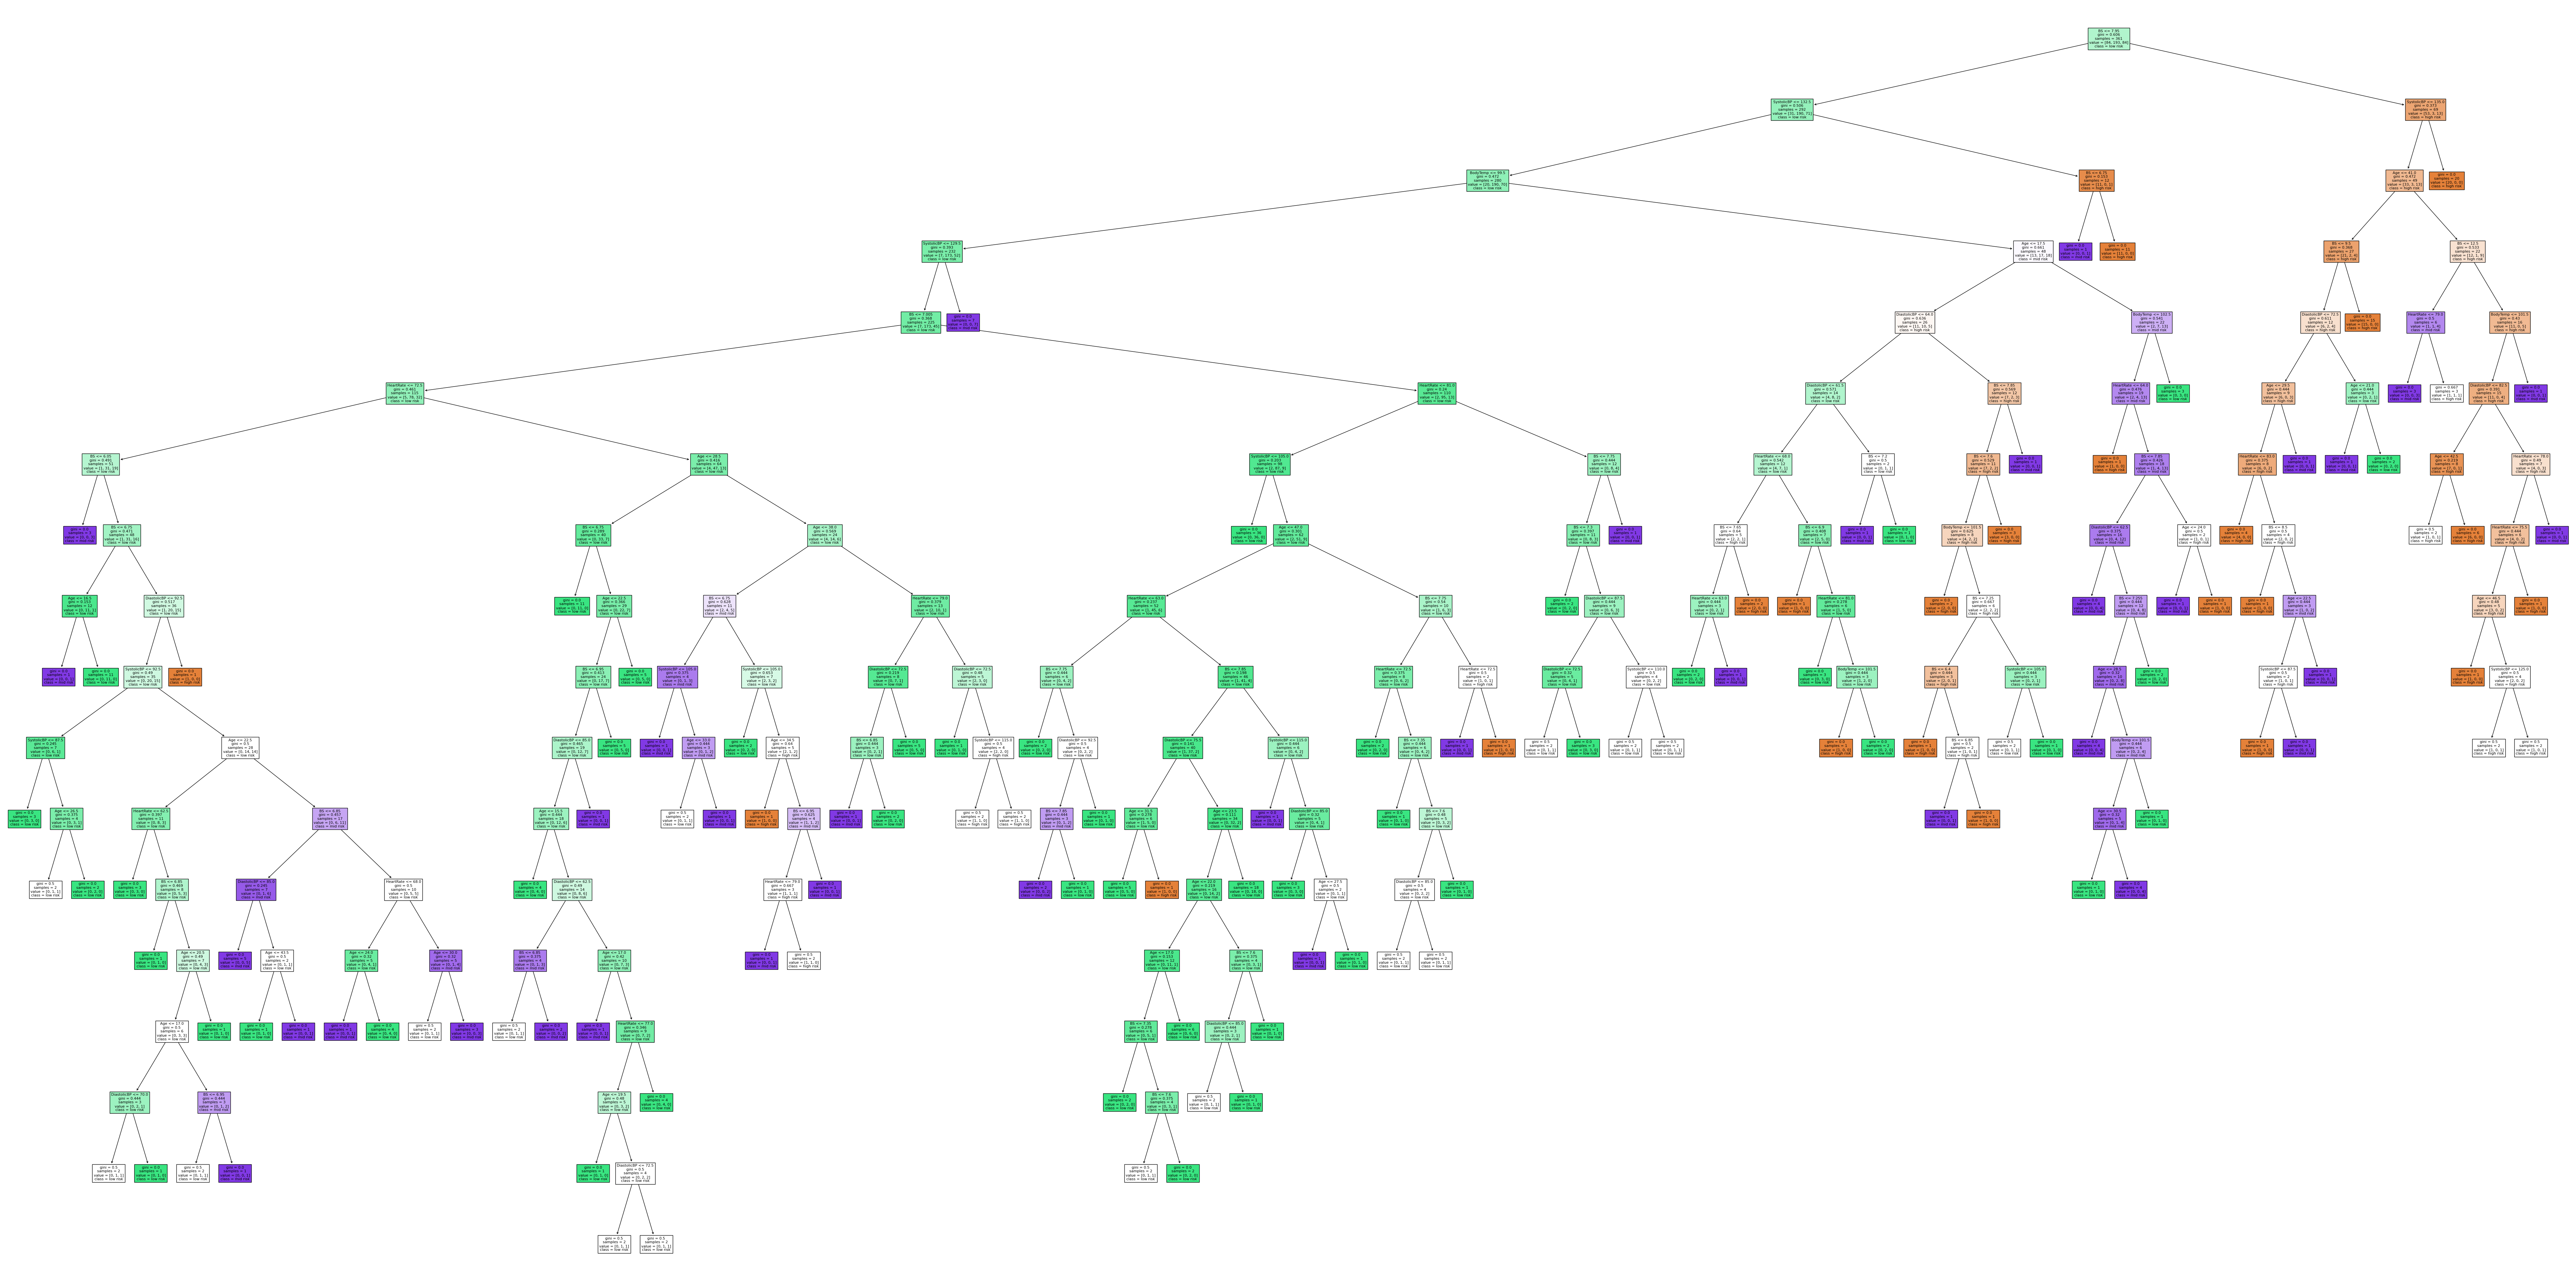

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier()  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"DecisionTreeClassifier Accuracy: {accuracy}")

plt.figure(figsize=(100, 50))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()


In [14]:
# uued categorical parameetrid
#def bp_category(row):
#    if row['SystolicBP'] < 120 and row['DiastolicBP'] < 80:
#        return 'normal'
#    elif 121 <= row['SystolicBP'] <= 131 and 81 <= row['DiastolicBP'] <= 99:
#        return 'moderate'
#    elif 132 <= row['SystolicBP'] <= 141 and 100 <= row['DiastolicBP'] <= 110:
#        return 'high' 
#    else:
#        return 'other'


#data['BPCategory'] = data.apply(bp_category, axis=1)

<title>Andmemudelid</title>

1. K Nearest Neighbors (KNN) on lihtne masinõppe meetod,  kasutatav nii klassifikatsioonis kui ka regressioonis. Algoritmi põhimõte seisneb selles, et ennustus tehakse sisendandmete põhjal, leides K kõige lähemat naabrit treeningandmete hulgas ja kasutades neid ennustuse tegemiseks. Algoritmi saab rakendada otse andmetele ilma keeruka eeltöötluse või eelneva mudeli treenimiseta.

In [15]:
# K Nearest Neighbors KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv("Maternal_Health_Risk_Dataset.csv")

data = data.drop_duplicates()

le = LabelEncoder()
data['RiskLevel'] = le.fit_transform(data['RiskLevel'])

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.64      0.88      0.74        41
           2       0.30      0.14      0.19        22

    accuracy                           0.64        91
   macro avg       0.57      0.56      0.55        91
weighted avg       0.60      0.64      0.60        91

Accuracy: 0.6373626373626373


2. Support Vector Classification (SVC) on masinõppe meetod, binaarne lineaarne klassifitseerija, mis ehitatakse selliselt, et leiab kõige parema hüperpinna ehk otsustuspiiri, mis eraldab kahte klassi andmepunktide ruumis. SVC on populaarne valik paljudes rakendustes, kus on vaja teha selget ja kindlat eristust kahe klassi vahel, näiteks pildituvastus, bioloogiliste andmete klassifikatsioon, tekstiklassifikatsioon ja paljudes teistes valdkondades.

In [16]:
#  Support Vector Classification
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print(f"Accuracy of SVM: {accuracy_score(y_test, svm_predictions)}")


Accuracy of SVM: 0.6483516483516484


In [17]:
# 3. LogisticRegression
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print(f"Accuracy of Logistic Regression: {accuracy_score(y_test, lr_predictions)}")

Accuracy of Logistic Regression: 0.6373626373626373


C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4. Random Forest**

Kuna RiskLevel on categorical parameeter, siis valisime klassifikatsiooni masinõpe meetodidest.

Juhuslik mets (RandomRorest RF) on masinõppe algoritm, mida kasutatakse nii klassifikatsiooni- kui ka regressiooniülesannetes, mis on suhteliselt kiire ja sobib paljude erinevate probleemide jaoks.

See põhineb mitme otsustuspuu kombineerimisel, et tekitada stabiilsem ja täpsem ennustus. Iga puu ehitatakse juhuslikult valitud andmepunktide ja tunnuste alamhulkade põhjal.  

RF suudab hakkama saada nii numbriliste kui ka kategooriliste andmetega. Samuti saab see hakkama puuduvate väärtustega. 

RF võimaldab hinnata tunnuste olulisust, aidates kindlaks teha, millised tunnused on mudeli jaoks kõige olulisemad. 

RF kombinatsioonilisus aitab tavaliselt saavutada paremat täpsust kui üksikul otsustuspuul. Kuna iga puu ehitatakse juhuslike alamhulkade põhjal, on lõplik mudel vähem tõenäoline üleõppimise suhtes kui üksik otsustuspuu.


In [18]:
# HW06 
# Random_Forest 

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_indices = X_train.index
test_indices = X_test.index

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred, output_dict=True)

print(f"Accuracy of Random Forest: {accuracy_score(y_test, rf_pred)}")

for label in report:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {label}:")
        print(f" Precision: {report[label]['precision']:.2f}")
        print(f" Recall: {report[label]['recall']:.2f}")
        print(f" F1-score: {report[label]['f1-score']:.2f}\n")


Accuracy of Random Forest: 0.6703296703296703
Class 0:
 Precision: 0.83
 Recall: 0.86
 F1-score: 0.84

Class 1:
 Precision: 0.70
 Recall: 0.76
 F1-score: 0.73

Class 2:
 Precision: 0.33
 Recall: 0.27
 F1-score: 0.30



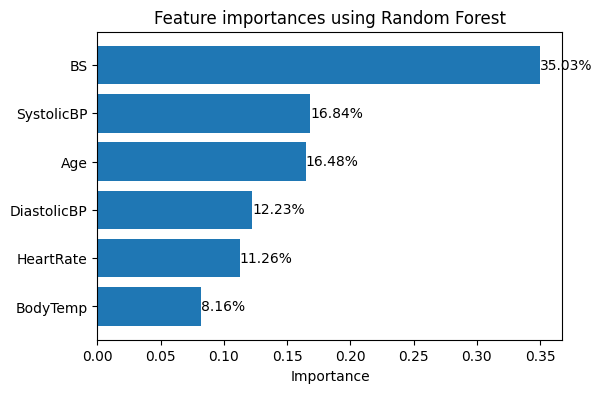

In [19]:
#Feature importances using Random Forest
feature_importances = rf_model.feature_importances_
feature_names = data.columns[:-1] 

sorted_idx = feature_importances.argsort()

plt.figure(figsize=(6,4))
bars = plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2%}', 
             va='center')
plt.yticks(range(X_train.shape[1]), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances using Random Forest')
plt.show()



In [20]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [1, 3, 5, 7, 10],  # Maximum depth of the tree
    'min_samples_split': [2,3, 5,7, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3,4,5]  # Minimum number of samples required at each leaf node
}

# Create a new Random Forest Classifier for Grid Search
rf = RandomForestClassifier(random_state=1)

# Create a Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by Grid Search
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [21]:
# Random_Forest optimeeritud hüperparameetritega

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train_indices = X_train.index
test_indices = X_test.index


rf_model = RandomForestClassifier(n_estimators=50, max_features=1,max_depth =5, min_samples_leaf=1, min_samples_split=3 ,random_state=1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred, output_dict=True)

print(f"Accuracy of Random Forest: {accuracy_score(y_test, rf_pred)}")

for label in report:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {label}:")
        print(f" Precision: {report[label]['precision']:.2f}")
        print(f" Recall: {report[label]['recall']:.2f}")
        print(f" F1-score: {report[label]['f1-score']:.2f}\n")


Accuracy of Random Forest: 0.7582417582417582
Class 0:
 Precision: 0.86
 Recall: 0.86
 F1-score: 0.86

Class 1:
 Precision: 0.71
 Recall: 1.00
 F1-score: 0.83

Class 2:
 Precision: 0.80
 Recall: 0.18
 F1-score: 0.30



In [22]:
# HW_05 confussion_matrix

#label_encoder = LabelEncoder()
#y_test_encoded = label_encoder.fit_transform(y_test)
#rf_pred_encoded = label_encoder.transform(rf_pred)
#cm = confusion_matrix(y_test_encoded, rf_pred_encoded)

cm = confusion_matrix(y_test, rf_pred)


unique_classes = np.unique(y_test)
num_classes = len(unique_classes)


def extract_values_from_cm(cm, class_index):
    TP = cm[class_index, class_index]
    FP = sum(cm[:, class_index]) - TP
    FN = sum(cm[class_index, :]) - TP
    TN = sum(sum(cm)) - TP - FP - FN
    return TN, FP, FN, TP

TN_0, FP_0, FN_0, TP_0 = extract_values_from_cm(cm, 0)
print("High Risk: TN:", TN_0, "FP:", FP_0, "FN:", FN_0, "TP:", TP_0)

TN_1, FP_1, FN_1, TP_1 = extract_values_from_cm(cm, 1)
print("Low Risk: TN:", TN_1, "FP:", FP_1, "FN:", FN_1, "TP:", TP_1)

TN_2, FP_2, FN_2, TP_2 = extract_values_from_cm(cm, 2)
print("Mid Risk: TN:", TN_2, "FP:", FP_2, "FN:", FN_2, "TP:", TP_2)



High Risk: TN: 59 FP: 4 FN: 4 TP: 24
Low Risk: TN: 33 FP: 17 FN: 0 TP: 41
Mid Risk: TN: 68 FP: 1 FN: 18 TP: 4


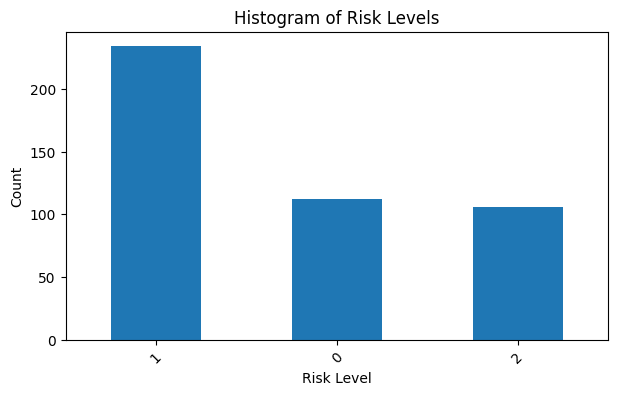

In [23]:
# Loome histogrammi RiskLevel veeru jaoks, et kontrollida klasside jaotust
plt.figure(figsize=(7, 4))
data['RiskLevel'].value_counts().plot(kind='bar')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Histogram of Risk Levels')
plt.xticks(rotation=45)
plt.show()



Testkomplektis on palju vale-positivseid (FP False Positive) LowRisk klassis ja vale-negatiivseid (FN False Negative) tulemusi.
Mudel ei suuda õigesti tuvastada positiivseid juhtumeid. 
Meditsiinilise diagnoosimise kontekstis võib see olla väga tõsine probleem, kuna tervise risk jääb diagnoosimata.

Mis võib olla põhjuseks.
Klasside tasakaalustamatus: Kui positiivne klass on suuruselt oluliselt väiksem, võib mudel olla kaldu eelkõige domineeriva klassi suunas, mis toob kaasa rohkem vale-negatiivseid tulemusi.
Meie andmestikus LowRisk klass on kaks korda suurem kui teised.

Madala kvaliteediga või puudulikud andmed: Kui andmetes on palju müra või nad ei sisalda piisavalt informatiivseid tunnuseid, võib see viia kõrge FN arvuni.

Klassifitseerimiskünnise vale valik: Mõnede mudelite puhul, nagu logistiline regressioon või otsustuspuudel põhinevad mudelid, võib kasutatud tõenäosuse künnis positiivsete või negatiivsete tulemuste klassifitseerimiseks olla valesti seadistatud.

Sobimatu mudel või parameetrid: Mõned mudelid võivad olla võimetud andmete keerukust tabama, mis viib kõrge FN arvuni.

kuna kasutasime erinevaid mudeleid ja kõikides 

Index([660, 590, 424, 227, 420, 408,  66, 141, 145,  92, 534, 529, 613, 480,
       355, 550, 444, 592,  80, 585,  18, 410],
      dtype='int64')
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
660   30         120           80   9.0     101.0         76          2
590   23         100           85   7.5      98.0         66          2
424   25         120          100   6.8      98.0         60          2
227   29         120           75   7.2     100.0         70          0
420   60         120           80   6.8      98.0         77          2
408   12         120           95   6.8      98.0         60          2
66    17          85           60   9.0     102.0         86          2
141   17          90           60   6.9     101.0         76          2
145   14          90           65   7.0     101.0         70          0
92    13          90           65   7.8     101.0         80          2
534   30         120           80   7.5     101.0         76  

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

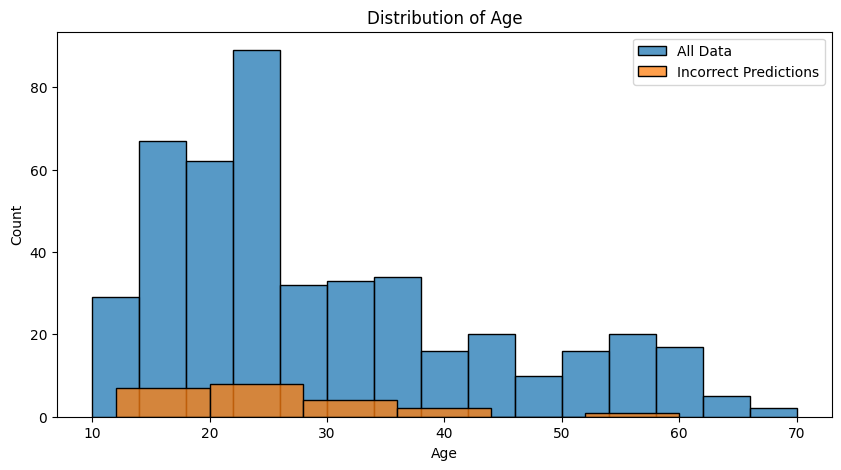

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

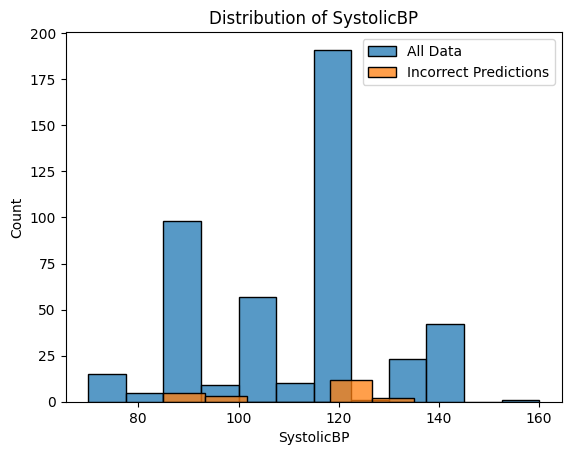

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

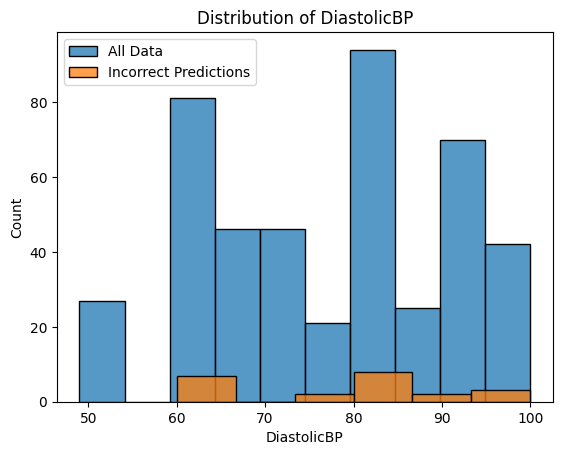

C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cqu3605\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

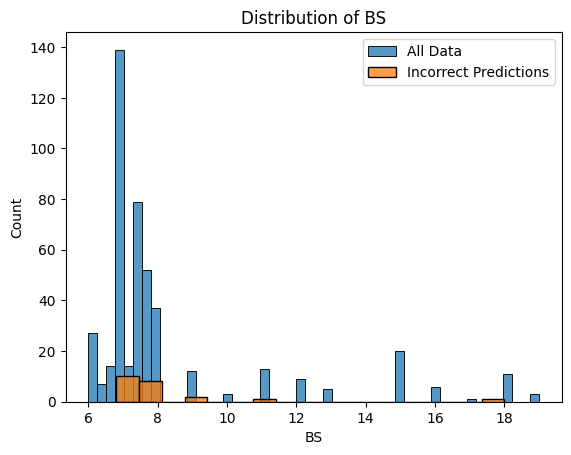

In [24]:
# valesti ennustatud features
incorrect_indices = test_indices[y_test != rf_pred]
incorrect_predictions = data.loc[incorrect_indices]

print(incorrect_indices)
print(incorrect_predictions)

plt.figure(figsize=(10, 5))

sns.histplot(data['Age'], label='All Data', kde=False)
sns.histplot(incorrect_predictions['Age'], label='Incorrect Predictions', kde=False)

plt.title('Distribution of Age')
plt.legend()
plt.show()

sns.histplot(data['SystolicBP'], label='All Data', kde=False)
sns.histplot(incorrect_predictions['SystolicBP'], label='Incorrect Predictions', kde=False)

plt.title('Distribution of SystolicBP')
plt.legend()
plt.show()


sns.histplot(data['DiastolicBP'], label='All Data', kde=False)
sns.histplot(incorrect_predictions['DiastolicBP'], label='Incorrect Predictions', kde=False)

plt.title('Distribution of DiastolicBP')
plt.legend()
plt.show()


sns.histplot(data['BS'], label='All Data', kde=False)
sns.histplot(incorrect_predictions['BS'], label='Incorrect Predictions', kde=False)

plt.title('Distribution of BS')
plt.legend()
plt.show()

Accuracy of Random Forest: 0.8719211822660099
Class high risk:
 Precision: 0.89
 Recall: 0.94
 F1-score: 0.91

Class low risk:
 Precision: 0.89
 Recall: 0.87
 F1-score: 0.88

Class mid risk:
 Precision: 0.82
 Recall: 0.81
 F1-score: 0.82

In [25]:
# Laadime andmestiku uuesti, tasakaalustame andmed klassides

data_uploaded = pd.read_csv("Maternal_Health_Risk_Dataset.csv")

condition1 = (data_uploaded["BS"] > 15) & (data_uploaded["RiskLevel"] != 'high risk')
condition2 = data_uploaded["HeartRate"] < 50

data_uploaded  = data_uploaded[~(condition1|condition2 )] 

data_no_duplicates = data_uploaded.drop_duplicates()

class_distribution_before = data_no_duplicates['RiskLevel'].value_counts()

low_risk = data_no_duplicates[data_no_duplicates['RiskLevel'] == 'low risk']
high_risk = data_no_duplicates[data_no_duplicates['RiskLevel'] == 'high risk']
mid_risk = data_no_duplicates[data_no_duplicates['RiskLevel'] == 'mid risk']

high_risk_upsampled = resample(high_risk, replace=True, n_samples=len(low_risk), random_state=1)
mid_risk_upsampled = resample(mid_risk, replace=True, n_samples=len(low_risk), random_state=1)

balanced_data = pd.concat([low_risk, high_risk_upsampled, mid_risk_upsampled])


class_distribution_after = balanced_data['RiskLevel'].value_counts()
class_distribution_before, class_distribution_after


(RiskLevel
 low risk     233
 high risk    112
 mid risk     101
 Name: count, dtype: int64,
 RiskLevel
 low risk     233
 high risk    233
 mid risk     233
 Name: count, dtype: int64)

In [26]:
# Jagame tasakaalustatud andmekogumi treening- ja testkogumiteks
X_balanced = balanced_data.drop('RiskLevel', axis=1)
y_balanced = balanced_data['RiskLevel']
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=1)


rf_balanced = RandomForestClassifier(n_estimators=50, max_features=1,max_depth =5, min_samples_leaf=1, min_samples_split=3 ,random_state=1)
rf_balanced.fit(X_train_balanced, y_train_balanced)

balanced_pred = rf_balanced.predict(X_test_balanced)

balanced_accuracy = accuracy_score(y_test_balanced, balanced_pred)
balanced_classification_report = classification_report(y_test_balanced, balanced_pred)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test_balanced, balanced_pred, average=None, labels=['high risk', 'low risk', 'mid risk'])


performance_metrics = pd.DataFrame({
    'Class': ['high risk', 'low risk', 'mid risk'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore
})

performance_metrics

,Class,Precision,Recall,F1-Score
0,high risk,0.723404,0.850000,0.781609
1,low risk,0.638889,0.901961,0.747967
2,mid risk,0.666667,0.285714,0.400000


In [27]:
# 0.7714285714285715
#Class	Precision	Recall	F1-Score
#0	high risk	0.875000	0.875000	0.875000
#1	low risk	0.692308	0.882353	0.775862
#2	mid risk	0.800000	0.571429	0.666667

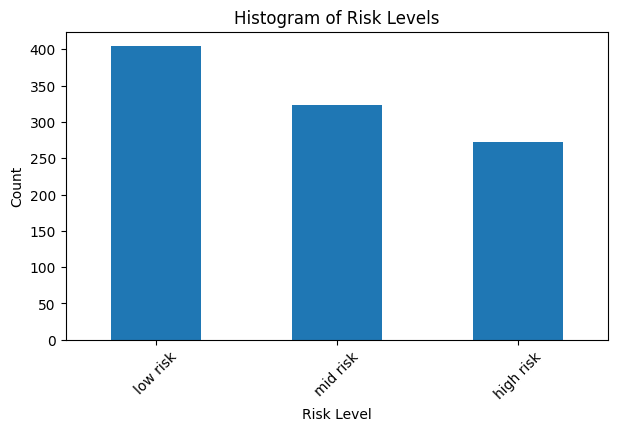

Accuracy of Random Forest: 0.89
Class high risk:
 Precision: 0.95
 Recall: 0.94
 F1-score: 0.95

Class low risk:
 Precision: 0.91
 Recall: 0.88
 F1-score: 0.89

Class mid risk:
 Precision: 0.80
 Recall: 0.84
 F1-score: 0.82



In [28]:
# Random_Forest puhastamata andmetega

data_orig = pd.read_csv("Maternal_Health_Risk_Dataset.csv")

condition1 = (data_orig["BS"] > 15) & (data_orig["RiskLevel"] != 'high risk')
condition2 = data_orig["HeartRate"] < 50


data_orig = data_orig[~(condition1|condition2 )] 

plt.figure(figsize=(7, 4))
data_orig['RiskLevel'].value_counts().plot(kind='bar')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Histogram of Risk Levels')
plt.xticks(rotation=45)
plt.show()


X = data_orig.drop('RiskLevel', axis=1)
y = data_orig['RiskLevel']


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


rf_model = RandomForestClassifier( random_state=1) #n_estimators=1000, max_depth=5, min_samples_split=2,min_samples_leaf=1,
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred, output_dict=True)

print(f"Accuracy of Random Forest: {accuracy_score(y_test, rf_pred)}")

for label in report:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {label}:")
        print(f" Precision: {report[label]['precision']:.2f}")
        print(f" Recall: {report[label]['recall']:.2f}")
        print(f" F1-score: {report[label]['f1-score']:.2f}\n")